<a href="https://colab.research.google.com/github/amitjslearn/stock_price_prediction/blob/master/yb/yb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load


In [0]:
# Importing the training set
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/YESBANK.BO(1).csv'); #dataset

In [75]:
dataset.shape

(2220, 7)

In [76]:
dataset.isnull().values.any()

True

In [77]:
 dataset.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [0]:
dataset_ = dataset.dropna(how='any',axis=0) ; #dataset_

In [79]:
 dataset_.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [0]:
dataset = dataset_ 

In [81]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.2)
print(train.shape)
print(test.shape)

(1771, 7)
(443, 7)


In [84]:
training_set = train.iloc[:, 1:2].values; 
training_set.shape

(1771, 1)

In [85]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)); sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [86]:
training_set_scaled = sc.fit_transform(training_set);training_set_scaled.shape

(1771, 1)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, train.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [88]:
X_train.shape

(1711, 60)

In [89]:
y_train.shape

(1711,)

In [90]:
X_train

array([[0.08895766, 0.33366156, 0.04982416, ..., 0.82627656, 0.48313403,
        0.73821912],
       [0.33366156, 0.04982416, 0.33754394, ..., 0.48313403, 0.73821912,
        0.54016034],
       [0.04982416, 0.33754394, 0.85469117, ..., 0.73821912, 0.54016034,
        0.47207764],
       ...,
       [0.08496271, 0.5820509 , 0.53115768, ..., 0.34120128, 0.76522715,
        0.72865379],
       [0.5820509 , 0.53115768, 0.04498523, ..., 0.76522715, 0.72865379,
        0.13911941],
       [0.53115768, 0.04498523, 0.07933604, ..., 0.72865379, 0.13911941,
        0.09790407]])

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential([
    Dense(60, input_shape=(60,)),
    Activation('relu'), 
    Dense(10), 
    Activation('softmax'),
    Dense(1),
    Activation('sigmoid'),
])


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [106]:

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1711/1711 [==============================] - 0s 48us/step - loss: 0.0759
Epoch 2/100
1711/1711 [==============================] - 0s 39us/step - loss: 0.0755
Epoch 3/100
1711/1711 [==============================] - 0s 35us/step - loss: 0.0749
Epoch 4/100
1711/1711 [==============================] - 0s 36us/step - loss: 0.0748
Epoch 5/100
1711/1711 [==============================] - 0s 38us/step - loss: 0.0741
Epoch 6/100
1711/1711 [==============================] - 0s 37us/step - loss: 0.0733
Epoch 7/100
1711/1711 [==============================] - 0s 38us/step - loss: 0.0727
Epoch 8/100
1711/1711 [==============================] - 0s 38us/step - loss: 0.0721
Epoch 9/100
1711/1711 [==============================] - 0s 41us/step - loss: 0.0708
Epoch 10/100
1711/1711 [==============================] - 0s 37us/step - loss: 0.0694
Epoch 11/100
1711/1711 [==============================] - 0s 35us/step - loss: 0.0693
Epoch 12/100
1711/1711 [==============================] - 0s 39

In [107]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 60)                3660      
_________________________________________________________________
activation_6 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                610       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 4,281
Trainable params: 4,281
Non-trainable params: 0
____________________________________________________

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = test
dataset_train = train
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [0]:
inputs = inputs.reshape(-1,1); 
inputs = sc.transform(inputs)
X_test = []
for i in range(60, test.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

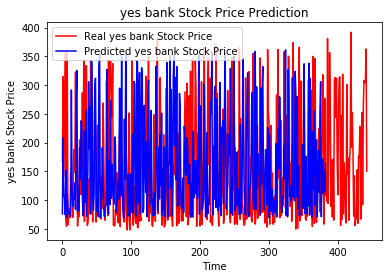

In [111]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real yes bank Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted yes bank Stock Price')
plt.title('yes bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('yes bank Stock Price')
plt.legend()
plt.show()

**with LSTM**

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Initialising the RNN
regressor = Sequential()

In [59]:
regressor

In [0]:
#X_train[1]

In [61]:
X_train.shape

(1711, 60, 1)

In [62]:
X_train.shape[1:]

(60, 1)

In [63]:
stop

NameError: ignored

In [0]:
?Dense

In [0]:
# Adding the first LSTM layer and some Dropout regularisation
u=60
regressor.add(LSTM(units = u, return_sequences = True, input_shape =(X_train.shape) ))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = u))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
#error

In [0]:
regressor.summary()

In [0]:
# Fitting the RNN to the Training set6
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = test
dataset_train = train
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [0]:
inputs = inputs.reshape(-1,1); 
inputs = sc.transform(inputs)
X_test = []
for i in range(60, test.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
stop here

In [0]:
#!pip3 install ann_visualizer

In [0]:
#!pip3 install graphviz

In [0]:
#!conda install -c conda-forge ann_visualizer

from ann_visualizer.visualize import ann_viz
ann_viz(regressor, title="My first neural network")

import dill
dill.dump_session('notebook_env.db')

In [0]:
filename = '/content/drive/My Drive/Colab Notebooks/new_model.sav'
dump(regressor,filename)

In [0]:
# load the model from disk
loaded_model = load(filename)

In [0]:
print(loaded_model)

In [0]:
predicted_stock_price_loaded = loaded_model.predict(X_test)
predicted_stock_price_loaded = sc.inverse_transform(predicted_stock_price_loaded)

'TPU  Stock Price Prediction'

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_loaded, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('TPU  Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
%who